# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [9]:
data = pd.read_csv('weight-height.csv')
male_df =  data[data['Gender'] == 'Male']
female_df =  data[data['Gender'] == 'Female']

men_height_mean = male_df['Height'].mean() 
men_height_sd = male_df['Height'].std()

men_weight_mean = male_df['Weight'].mean() 
men_weight_sd = male_df['Weight'].std()

women_height_mean = female_df['Height'].mean() 
women_height_sd = female_df['Height'].std()

women_weight_mean = female_df['Weight'].mean() 
women_weight_sd = female_df['Weight'].std()

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

print(men_height_mean,men_height_sd,men_weight_mean,men_weight_sd)
print(women_height_mean,women_height_sd,women_weight_mean,women_weight_sd)

69.02634590621737 2.8633622286606517 187.0206206581929 19.781154516763813
63.708773603424916 2.696284015765056 135.8600930074687 19.022467805319007


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

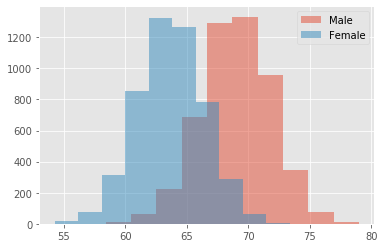

In [16]:
# Your code here
fig,ax = plt.subplots()
ax.hist(male_df['Height'],bins=10,alpha = 0.5,)
ax.hist(female_df['Height'],bins=10,alpha = 0.5)
ax.legend(['Male','Female'],loc='best')

In [17]:
# Record your observations - are these inline with your personal observations?
# Men have a higher mean height than women. Seems about right given what we know about sexual dimorphism in humans. 

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

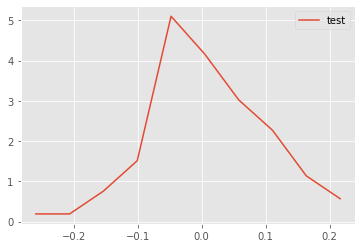

In [51]:
def density(x):
    n, bins = np.histogram(x,10,density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k] + bins[k + 1])
        pdfy[k] = n[k]
    
    return (pdfx,pdfy)


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

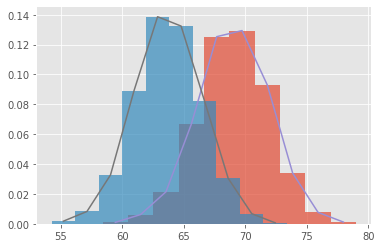

In [52]:
male_x,male_y = density(male_df['Height'])
female_x,female_y = density (female_df['Height'])

plt.hist(male_df['Height'],bins = 10, density = True, alpha = 0.7, label = "Male Height" )
plt.hist(female_df['Height'],bins = 10, density = True, alpha = 0.7, label = "Feale Height" )
#female_df['Height'].plot.hist(bins = 20, density = True, alpha = 0.7, label = "Female Height" )

plt.plot(male_x,male_y)
plt.plot(female_x,female_y)

## Repeat the above exercise for male and female weights

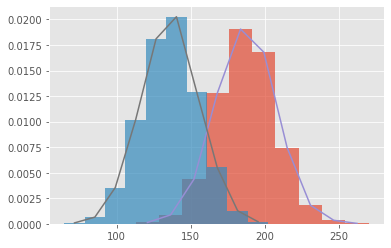

In [53]:
# Your code here 
male_x,male_y = density(male_df['Weight'])
female_x,female_y = density (female_df['Weight'])

plt.hist(male_df['Weight'],bins = 10, density = True, alpha = 0.7, label = "Male Weight" )
plt.hist(female_df['Weight'],bins = 10, density = True, alpha = 0.7, label = "Female Weight" )
#female_df['Height'].plot.hist(bins = 20, density = True, alpha = 0.7, label = "Female Height" )

plt.plot(male_x,male_y)
plt.plot(female_x,female_y)

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

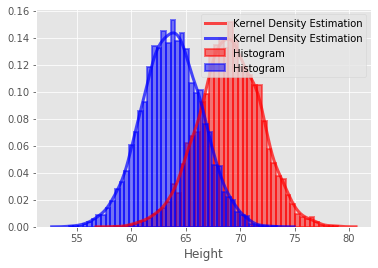

In [67]:
# Code for heights here
import seaborn as sns
import scipy.stats as stats

sns.distplot(male_df['Height'],
            hist=True, hist_kws={
                                "linewidth":2,
                                "edgecolor":'red',
                                "alpha":0.5,
                                "color":"red",
                                "label":'Histogram'
                                },
             kde=True, kde_kws = {
                 'linewidth': 3,
                 'color': 'red',
                 'alpha': 0.7,
                 'label':"Kernel Density Estimation"
             },           
            )

sns.distplot(female_df['Height'],
            hist=True, hist_kws={
                                "linewidth":2,
                                "edgecolor":'blue',
                                "alpha":0.5,
                                "color":"blue",
                                "label":'Histogram'
                                },
             kde=True, kde_kws = {
                 'linewidth': 3,
                 'color': 'blue',
                 'alpha': 0.7,
                 'label':"Kernel Density Estimation"
             },             
            )

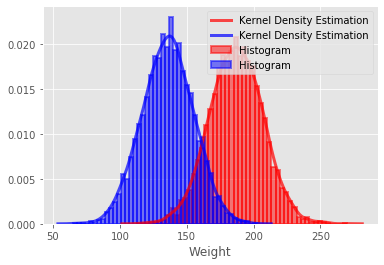

In [68]:
# Code for weights here
sns.distplot(male_df['Weight'],
            hist=True, hist_kws={
                                "linewidth":2,
                                "edgecolor":'red',
                                "alpha":0.5,
                                "color":"red",
                                "label":'Histogram'
                                },
             kde=True, kde_kws = {
                 'linewidth': 3,
                 'color': 'red',
                 'alpha': 0.7,
                 'label':"Kernel Density Estimation"
             },           
            )

sns.distplot(female_df['Weight'],
            hist=True, hist_kws={
                                "linewidth":2,
                                "edgecolor":'blue',
                                "alpha":0.5,
                                "color":"blue",
                                "label":'Histogram'
                                },
             kde=True, kde_kws = {
                 'linewidth': 3,
                 'color': 'blue',
                 'alpha': 0.7,
                 'label':"Kernel Density Estimation"
             },             
            )

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.